# 前置作業

In [2]:
from tensorflow.keras import datasets
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np  

### 1.把MNIST資料抓出來，分成traing&test，其中也分開圖片及數字標籤 

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
##手寫數字的MNIST有60000個training data及10,000個testing data。
#數字已正規化且在固定大小的影像置中

In [4]:
##查看資料分類狀態，以及圖片尺寸
print("training image =", x_train.shape)
print("training label =",y_train.shape)
print("testing image =",x_test.shape)
print("testing label =",y_test.shape)

## X=Number Image , y= Number label

training image = (60000, 28, 28)
training label = (60000,)
testing image = (10000, 28, 28)
testing label = (10000,)


<---------------------------------------------------------------------------->  
training 資料有60000筆，testing有10000筆  
X是圖片，y是數字標籤  
<---------------------------------------------------------------------------->  

### 2.看一下原本資料集圖片

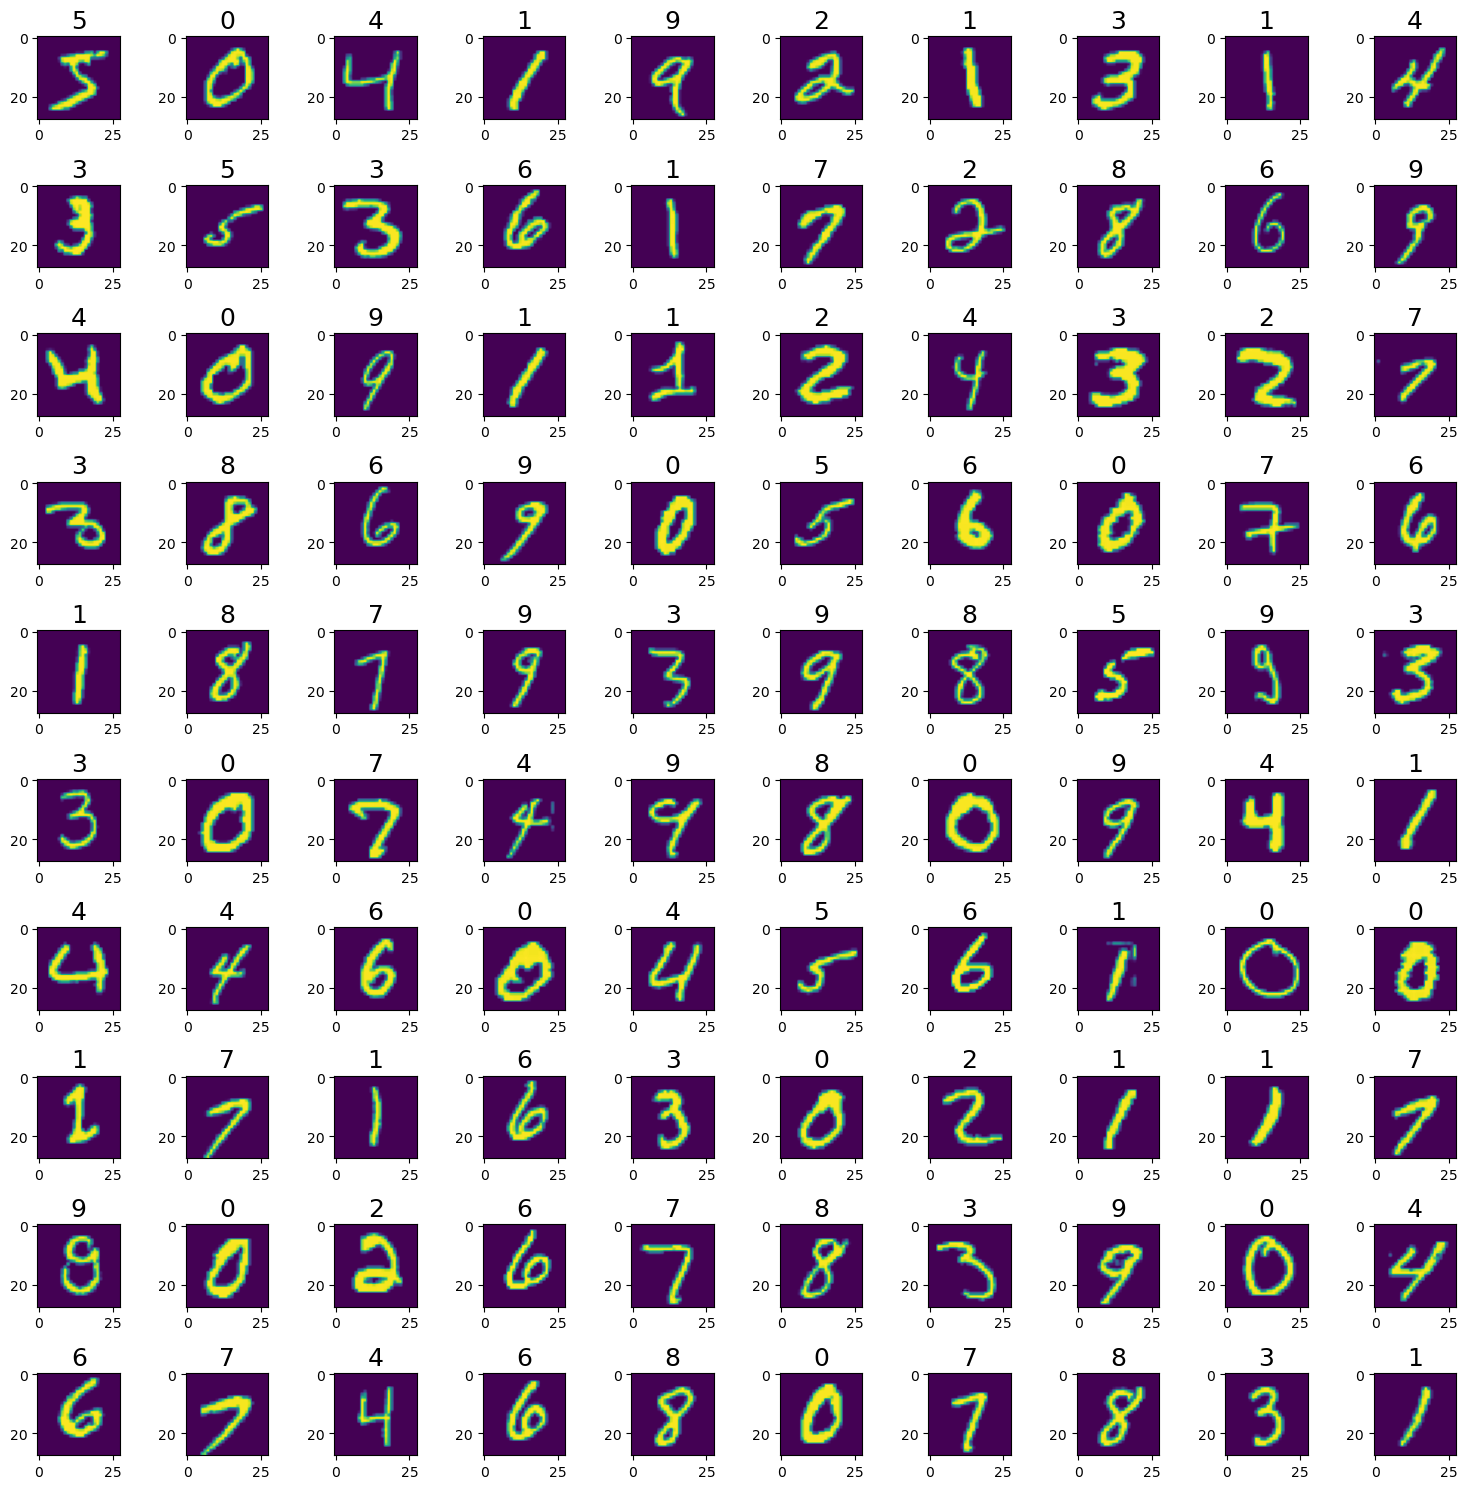

In [5]:
##draw picture看看內容
plt.figure(figsize=(15,15)) #設定圖片呈現大小

for i in range(0,100):  
  ax=plt.subplot(10,10,1+i)
  ax.imshow(x_train[i])  #加入cmap='gray'可以看黑白圖片
  title= str(y_train[i])
  ax.set_title(title, fontsize=18)  
plt.tight_layout()       
plt.show()

<----------------------------------------------------------->  
原本圖片是彩色的，先轉換成黑白色彩  
並且把原本圖片陣列(28*28)，轉換成一維(784)  
<----------------------------------------------------------->  

### 3. 圖片色彩轉換&更改維度

In [6]:
##將圖片轉成二維的資料
x_train= x_train.reshape(60000, 28*28).astype('float32')  
x_test = x_test.reshape(10000, 28*28).astype('float32')  
print("training image =", x_train.shape)
print("testing  image =",x_test.shape)

training image = (60000, 784)
testing  image = (10000, 784)


In [7]:
##原圖是彩色的--->把圖片變黑白
x_train = x_train/255
x_test = x_test/255

print(x_train[1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

# 建立模型:

In [8]:
from torch.nn import Module
from torch import nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import torch

##  1.自製的Neural Network

https://ithelp.ithome.com.tw/articles/10193469  
https://www.wpgdadatong.com/blog/detail/46474  

In [9]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)


batch_size=20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=20,num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20,num_workers=0)

In [10]:
## Define the NN architecture
class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(512, 512)
        self.relu1 = nn.ReLU()
        self.fc3=nn.Linear(512,256)
        self.relu2 = nn.ReLU()
        self.fc4=nn.Linear(256,256)
        self.relu3 = nn.ReLU()
        self.fc5=nn.Linear(256,128)
        self.relu4 = nn.ReLU()
        self.fc6=nn.Linear(128,128)
        self.relu5=nn.ReLU()
        # linear layer (n_hidden -> 10)
        self.fc7 = nn.Linear(128, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.relu1(x)
        x = self.fc3(x)
        x = self.relu2(x)
        x = self.fc4(x)
        x = self.relu3(x)
        x = self.fc5(x)
        x = self.relu4(x)
        x = self.fc6(x)
        x = self.relu5(x)
        x = self.fc7(x)
        return x

  
    
# initialize the NN
model_3 = Net_3()
print(model_3)
        
    
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.01)

Net_3(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (relu1): ReLU()
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (relu2): ReLU()
  (fc4): Linear(in_features=256, out_features=256, bias=True)
  (relu3): ReLU()
  (fc5): Linear(in_features=256, out_features=128, bias=True)
  (relu4): ReLU()
  (fc6): Linear(in_features=128, out_features=128, bias=True)
  (relu5): ReLU()
  (fc7): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [11]:
# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs
model_3.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_3(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 2.299236
Epoch: 2 	Training Loss: 1.690096
Epoch: 3 	Training Loss: 0.500218
Epoch: 4 	Training Loss: 0.295837
Epoch: 5 	Training Loss: 0.200099
Epoch: 6 	Training Loss: 0.152923
Epoch: 7 	Training Loss: 0.121728
Epoch: 8 	Training Loss: 0.098239
Epoch: 9 	Training Loss: 0.079608
Epoch: 10 	Training Loss: 0.064543


In [12]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model_3.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_3(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(10):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))



for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (str(i)))
        ##應該不是classes[i]，而是str(i)，classes[i] is not defined
        
              
              
              
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.117231

Test Accuracy of     0: 98% (474/482)
Test Accuracy of     1: 99% (550/554)
Test Accuracy of     2: 97% (500/513)
Test Accuracy of     3: 95% (493/518)
Test Accuracy of     4: 97% (480/490)
Test Accuracy of     5: 96% (397/412)
Test Accuracy of     6: 96% (468/484)
Test Accuracy of     7: 95% (504/529)
Test Accuracy of     8: 97% (480/493)
Test Accuracy of     9: 93% (491/525)

Test Accuracy (Overall): 96% (4837/5000)


## 2. CNN : LENET-5

https://github.com/gradient-ai/LeNet5-Tutorial/blob/main/LeNet5.ipynb  
https://blog.paperspace.com/writing-lenet5-from-scratch-in-python/  

In [9]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
train_data2 = datasets.MNIST(root='data', train=True,download=True, transform = transforms.Compose([
                                                          transforms.Resize((32,32)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(mean = (0.1307,), std = (0.3081,))]))
test_data2 = datasets.MNIST(root='data', train=False,download=True,  transform = transforms.Compose([
                                                          transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]))


batch_size=64

# prepare data loaders
train_loader2 = torch.utils.data.DataLoader(dataset = train_data2,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader2 = torch.utils.data.DataLoader(dataset = test_data2,
                                           batch_size = batch_size,
                                           shuffle = True)

https://blog.csdn.net/Zh_1999a/article/details/107526001  
https://medium.com/@yangcar/%E6%B7%BA%E5%AD%B8%E7%BF%92-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-ebc673ec97f7  
https://github.com/ChawDoe/LeNet5-MNIST-PyTorch/blob/master/train.py  
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [10]:
num_classes=10
class ConvNeuralNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
    
model_lenet = ConvNeuralNet(num_classes)
print(model_lenet)

ConvNeuralNet(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=400, out_features=120, bias=True)
  (relu): ReLU()
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


In [11]:
## Specify loss and optimization functions
##1. specify loss function
criterion = nn.CrossEntropyLoss()

##2. specify optimizer
optimizer = torch.optim.SGD(model_lenet.parameters(), lr=0.01)

# number of epochs to train the model
n_epochs = 10  # suggest training between 20-50 epochs

model_lenet.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    for data, target in train_loader2:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_lenet(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader2.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.669670
Epoch: 2 	Training Loss: 0.123982
Epoch: 3 	Training Loss: 0.087819
Epoch: 4 	Training Loss: 0.072127
Epoch: 5 	Training Loss: 0.062306
Epoch: 6 	Training Loss: 0.055138
Epoch: 7 	Training Loss: 0.050843
Epoch: 8 	Training Loss: 0.046043
Epoch: 9 	Training Loss: 0.042572
Epoch: 10 	Training Loss: 0.040140


In [12]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model_lenet.eval() # prep model for *evaluation*

for data, target in test_loader2:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model_lenet(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(10):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader2.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))



for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (str(i)))
        ##應該不是classes[i]，而是str(i)，classes[i] is not defined
        
              
              
              
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.039523

Test Accuracy of     0: 99% (165/166)
Test Accuracy of     1: 99% (170/171)
Test Accuracy of     2: 98% (165/167)
Test Accuracy of     3: 98% (160/162)
Test Accuracy of     4: 98% (141/143)
Test Accuracy of     5: 99% (139/140)
Test Accuracy of     6: 99% (149/150)
Test Accuracy of     7: 97% (145/148)
Test Accuracy of     8: 97% (140/143)
Test Accuracy of     9: 98% (178/180)

Test Accuracy (Overall): 98% (1552/1570)


## 4. Recusive Neural Network

# 發票數字影像裁切處理

https://finnysteps.blogspot.com/2019/02/python.html

In [15]:
import os
import cv2 as cv2
import PIL
from PIL import Image
os.chdir('D:\invoice')#change directory

## 發票處理--1

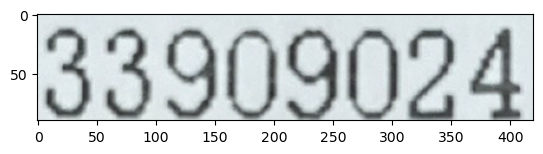

In [40]:
rawimg0 = cv2.imread("S__28573882.jpg")
# 對照片進行定位後裁切
cropped = rawimg0[460:550,430:850]
# 查看裁切後的照片
plt.imshow(cropped)

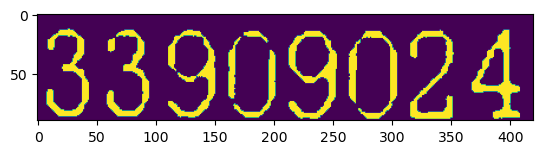

In [41]:
# 圖片灰階
grayscaleimg = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
#plt.imshow(grayscaleimg,cmap='gray')


# 圖片二值化
ret, binary = cv2.threshold(grayscaleimg, 130, 255, cv2.THRESH_BINARY) # 110這個數字可改
plt.imshow(binary,cmap='Greys',interpolation='None')
rawimg = binary - binary[0,1] #有這欄 圖的最低就會變成0 圖會變成黑底白字
plt.imshow(rawimg)

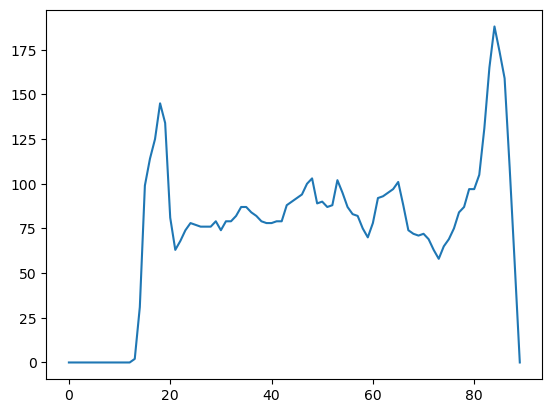

In [42]:
# counting non-zero value by row , axis y
row_nz = []
for row in rawimg.tolist():
    row_nz.append(len(row) - row.count(0))
plt.plot(row_nz)

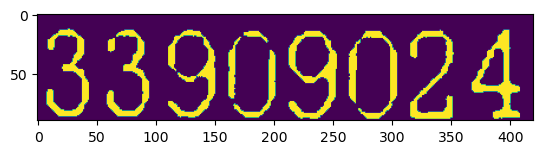

In [43]:
idx=np.array(row_nz)>(max(row_nz)/4) #截出上下的範圍
np.where(idx==1)[0][0],np.where(idx==1)[0][-1]
up_y=np.where(idx==1)[0][-1] #上界
down_y=np.where(idx==1)[0][0] #下界
plt.imshow(rawimg)


[8, 43, 94, 150, 201, 253, 304, 352, 408]


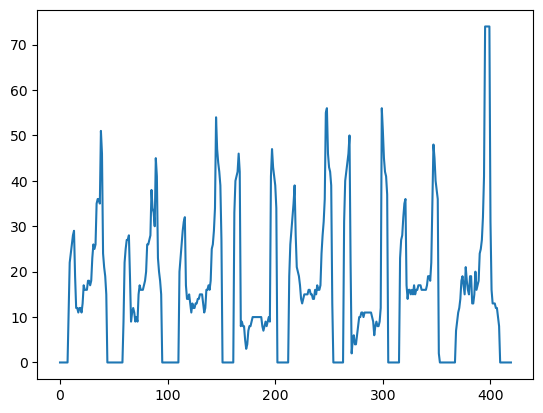

In [44]:
# counting non-zero value by column, x axis
col_nz = []
for col in rawimg.T.tolist():
    col_nz.append(len(col) - col.count(0))
plt.plot(col_nz)

idy=np.not_equal(col_nz,0)

record_y=[] #如果有八個數字，裡面應該要有九個格子(一開始找出七個，前後插入變九個)

for i in range(0,(len(np.where(idy==1)[0])-1)):
    # 如果下一個數是0就略過，直到找到下一個數不是0的位置
    if(np.where(idy==1)[0][i+1]-np.where(idy==1)[0][i]==1):
        pass
    else:
        record_y.append(np.where(idy==1)[0][i])

# 插入第一個非0位置跟最後一個非0的位置
record_y.insert(0,np.where(idy==1)[0][0])
record_y.append(np.where(idy==1)[0][-1])
print(record_y)

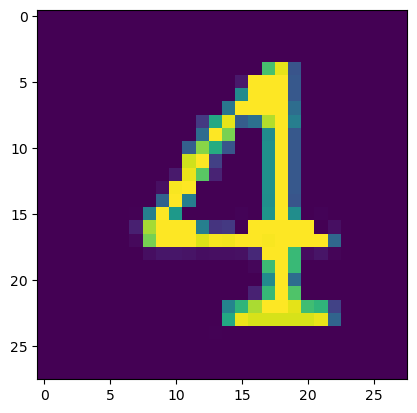

In [45]:
for i in range(0,len(record_y)-1):
    a=binary[down_y:up_y,record_y[i]+5:record_y[i+1]+5]
    a=cv2.resize(a, (28, 28), interpolation=cv2.INTER_CUBIC)
    a = cv2.bitwise_not(a)
    a = cv2.copyMakeBorder(a,6,6,6,6,cv2.BORDER_CONSTANT,value=0)#加上邊框，不要讓數字太靠進圖片邊緣
    a=cv2.resize(a, (28, 28), interpolation=cv2.INTER_CUBIC)
    img_name='%s-%s.png'%(1,i+1)
    cv2.imwrite(img_name,a)
    plt.imshow(a)

## 發票處理2

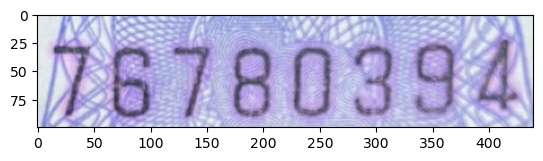

In [26]:
os.chdir('D:\invoice')#change directory
rawimg2 = cv2.imread("S__28573884.jpg")
# 對照片進行定位後裁切
rawimg2 = rawimg2 [480:580,340:780]
# 查看裁切後的照片
plt.imshow(rawimg2)

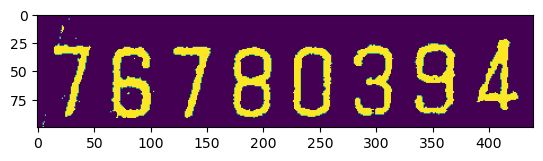

In [27]:
# 圖片灰階
grayscaleimg2 = cv2.cvtColor(rawimg2,cv2.COLOR_BGR2GRAY)
#plt.imshow(grayscaleimg,cmap='gray')


# 圖片二值化
ret, binary2 = cv2.threshold(grayscaleimg2, 155, 255, cv2.THRESH_BINARY) # 110這個數字可改
plt.imshow(binary2,cmap='Greys',interpolation='None')
rawimg2 = binary2 - binary2[0,1] #有這欄 圖的最低就會變成0 圖會變成黑底白字
plt.imshow(rawimg2)

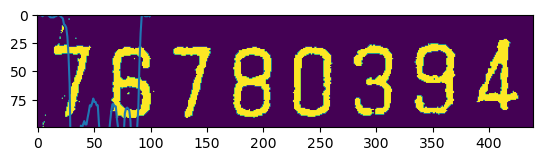

In [28]:
# counting non-zero value by row , axis y
row_nz = []
for row in rawimg2.tolist():
    row_nz.append(len(row) - row.count(0))
plt.plot(row_nz)

idx=np.array(row_nz)>(max(row_nz)/4) #截出上下的範圍
np.where(idx==1)[0][0],np.where(idx==1)[0][-1]
up_y=np.where(idx==1)[0][-1] #上界
down_y=np.where(idx==1)[0][0] #下界
plt.imshow(rawimg2)

[5, 7, 47, 100, 103, 153, 207, 261, 315, 370, 426]


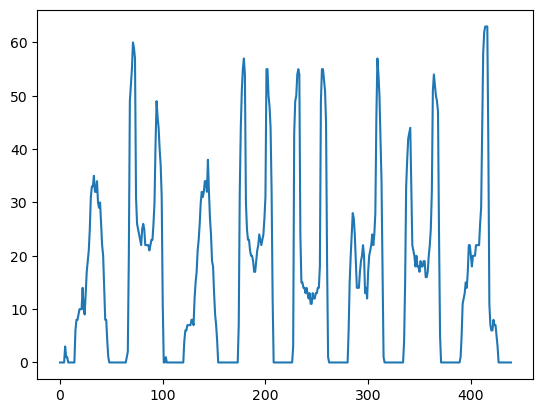

In [29]:
# counting non-zero value by column, x axis
col_nz = []
for col in rawimg2.T.tolist():
    col_nz.append(len(col) - col.count(0))
plt.plot(col_nz)

idy=np.not_equal(col_nz,0)

record_y=[] #如果有八個數字，裡面應該要有九個格子(一開始找出七個，前後插入變九個)

for i in range(0,(len(np.where(idy==1)[0])-1)):
    # 如果下一個數是0就略過，直到找到下一個數不是0的位置
    if(np.where(idy==1)[0][i+1]-np.where(idy==1)[0][i]==1):
        pass
    else:
        record_y.append(np.where(idy==1)[0][i])

# 插入第一個非0位置跟最後一個非0的位置
record_y.insert(0,np.where(idy==1)[0][0])
record_y.append(np.where(idy==1)[0][-1])
print(record_y)

In [30]:
# 檢查數字
rm_id=[]
if len(record_y)>9:
    for j in range(0,len(record_y)-1):
        temp=np.array(col_nz[record_y[j]:record_y[j+1]])
        #如果只是雜訊，就刪掉
        if sum(temp>(max(col_nz)/4))==0:
            rm_id.append(record_y[j+1])

for x in rm_id:
     record_y.remove(x)

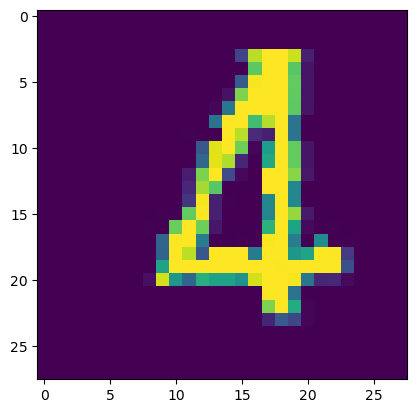

In [31]:
for i in range(0,len(record_y)-1):
    b=binary2[down_y:up_y,record_y[i]+5:record_y[i+1]+5]
    b=cv2.resize(b, (28, 28), interpolation=cv2.INTER_CUBIC)
    b = cv2.bitwise_not(b)
    b = cv2.copyMakeBorder(b,4,4,4,4,cv2.BORDER_CONSTANT,value=0)#加上邊框，不要讓數字太靠進圖片邊緣
    b=cv2.resize(b, (28, 28), interpolation=cv2.INTER_CUBIC)
    img_name='%s-%s.png'%(2,i+1)
    cv2.imwrite(img_name,b)
    plt.imshow(b)

# 發票照片放入模型比對準確率

## 自製Neural Network

In [48]:
model_3.eval()

# define圖像的處裡轉換
transform = transforms.Compose([
    transforms.Grayscale(),  # 轉灰階
    transforms.ToTensor(),   # 轉張量
    transforms.Normalize((0.1307,), (0.3081,))  # 標準化
    
])

for i in range(0,8):

    img2= Image.open(r'D:\invoice\1-%s.png'%(str(i+1)))
    plt.show(img2)
   
    
    # 用剛剛定義的預處理圖像定義

    img2 = transform(img2)
     
    # 轉一維向量
    image_vector = img2.view(1, -1)
   
   
    # 模型推理
    output = model_3(image_vector)
    predicted_label = torch.argmax(output, dim=1)
    
    # 看結果
    #im = cv2.imread(r'D:\invoice\1-%s.png'%(str(i+1)))
    #plt.imshow(im)
    #plt.show()
    print("Predicted label %s:"%(i+1), predicted_label.item())

##33909024:correct

Predicted label 1: 3
Predicted label 2: 3
Predicted label 3: 5
Predicted label 4: 0
Predicted label 5: 9
Predicted label 6: 0
Predicted label 7: 2
Predicted label 8: 4


In [47]:
model_3.eval()

# define圖像的處裡轉換
transform = transforms.Compose([
    transforms.Grayscale(),  # 轉灰階
    transforms.ToTensor(),   # 轉張量
    transforms.Normalize((0.1307,), (0.3081,))  # 標準化
    
])

for i in range(0,8):

    img2= Image.open(r'D:\invoice\2-%s.png'%(str(i+1)))
    plt.show(img2)
   
    
    # 用剛剛定義的預處理圖像定義

    img2 = transform(img2)
     
    # 轉一維向量
    image_vector = img2.view(1, -1)
   
   
    # 模型推理
    output = model_3(image_vector)
    predicted_label = torch.argmax(output, dim=1)
    
    # 看結果
    #im = cv2.imread(r'D:\invoice\2-%s.png'%(str(i+1)))
    #plt.imshow(im)
    #plt.show()
    print("Predicted label %s:"%(i+1), predicted_label.item())

##76780394:75780056

Predicted label 1: 3
Predicted label 2: 5
Predicted label 3: 7
Predicted label 4: 8
Predicted label 5: 0
Predicted label 6: 3
Predicted label 7: 5
Predicted label 8: 6


## lenet-5模型預測

In [22]:
model_lenet.eval()

# define圖像的處裡轉換
transform = transforms.Compose([
    #transforms.Grayscale(),  # 轉灰階
    transforms.ToTensor(),   # 轉張量
    transforms.Resize((32,32)),
    transforms.Normalize((0.1307,), (0.3081,))  # 標準化
    
])

for i in range(0,8):

    img= Image.open(r'D:\invoice\1-%s.png'%(str(i+1)))
    # 用剛剛定義的預處理圖像定義
    img = transform(img)
    #img2 = img2.view(1, -1)
    #img2=img/255.0
    # 確保通道數為1
    img2 = torch.unsqueeze(img, dim=0)

    # 将图像转换为模型所期望的输入形状
   # image = img2.unsqueeze(0)  # 增加一维作为batch维度
    output = model_lenet(img2)
    predicted_label = torch.argmax(output, dim=1)

    # 看結果
    #im = cv2.imread(r'D:\invoice\2-%s.png'%(str(i+1)))
    #plt.imshow(im)
    #plt.show()
    print("Predicted label %s:"%(i+1), predicted_label.item())

##33909024:33303024

Predicted label 1: 3
Predicted label 2: 3
Predicted label 3: 3
Predicted label 4: 0
Predicted label 5: 3
Predicted label 6: 0
Predicted label 7: 2
Predicted label 8: 4


In [21]:
model_lenet.eval()

# define圖像的處裡轉換
transform = transforms.Compose([
    #transforms.Grayscale(),  # 轉灰階
    transforms.ToTensor(),   # 轉張量
    transforms.Resize((32,32)),
    transforms.Normalize((0.1307,), (0.3081,))  # 標準化
    
])

for i in range(0,8):

    img= Image.open(r'D:\invoice\2-%s.png'%(str(i+1)))
    # 用剛剛定義的預處理圖像定義
    img = transform(img)
    #img2 = img2.view(1, -1)
    #img2=img/255.0
    # 確保通道數為1
    img2 = torch.unsqueeze(img, dim=0)

    # 将图像转换为模型所期望的输入形状
   # image = img2.unsqueeze(0)  # 增加一维作为batch维度
    output = model_lenet(img2)
    predicted_label = torch.argmax(output, dim=1)

    # 看結果
    #im = cv2.imread(r'D:\invoice\2-%s.png'%(str(i+1)))
    #plt.imshow(im)
    #plt.show()
    print("Predicted label %s:"%(i+1), predicted_label.item())

##76780394:78780382

Predicted label 1: 7
Predicted label 2: 8
Predicted label 3: 7
Predicted label 4: 8
Predicted label 5: 0
Predicted label 6: 3
Predicted label 7: 8
Predicted label 8: 2
